In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

df= pd.read_excel('output_params_Phase.xlsx')

# # FCC=0, FCC+BCC=1, BCC=2

data= df.drop('Phase',axis='columns')
target= df['Phase']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(data,target,test_size=0.2,random_state=42)

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [1,2,3,4,5,6,50],
    
    'weights': ['uniform', 'distance'],
    
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy',verbose=3)
grid.fit(xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.958 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.961 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.962 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.958 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.961 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.962 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.951 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.951 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.955 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.958 total time=   0.0s
[CV 

[CV 2/3] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.961 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.962 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.958 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.961 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.962 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.951 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.951 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.955 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.958 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.961 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_n

In [4]:
grid.score(xtest, ytest)

0.9753521126760564

In [5]:
ypred= grid.predict(xtest)

Text(0, 0.5, 'actual phase\n              (BCC= 2, FCC+BCC= 1, FCC= 0)  ')

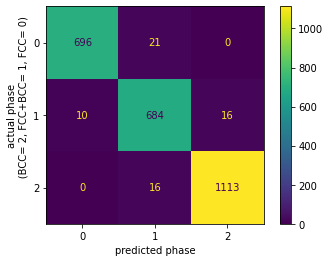

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(grid, xtest, ytest)
plt.xlabel('predicted phase')
plt.ylabel('''actual phase
              (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')


In [7]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       717
           1       0.95      0.96      0.96       710
           2       0.99      0.99      0.99      1129

    accuracy                           0.98      2556
   macro avg       0.97      0.97      0.97      2556
weighted avg       0.98      0.98      0.98      2556



In [8]:
from sklearn.inspection import permutation_importance


pi= permutation_importance(grid, xtrain, ytrain, random_state=42)
result=pi.importances_mean

fi = pd.DataFrame(result, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi)

       importance
Tm       0.432789
Ni       0.318987
Cr       0.143930
Al       0.086804
Co       0.067182
Fe       0.062878
ΔHₘᵢₓ    0.007669
δ        0.003502
Ω        0.001996
VEC      0.000919
Δsₘᵢₓ    0.000763
Δχ       0.000000
